#Taller: Árboles de decisión

En este taller analizaremos aspectos de árboles de decisión para varios conjuntos de datos. El primero es el [Play tennis dataset](https://www.kaggle.com/datasets/fredericobreno/play-tennis). El segundo es el [Iris dataset](https://archive.ics.uci.edu/ml/datasets/iris). El tercero es el [Pima Indians Diabetes Database](https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database). El cuarto es [Hitters](https://www.kaggle.com/datasets/floser/hitters).

El taller consiste en realizar todas las tareas numeradas del 1 al 13.
Cargar el cuaderno ejecutado y guardado en formato .ipynb y en formato .HTML a más tardar el martes 22 de agosto a las 11:00am.

In [1]:
#Importar librerías
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree, DecisionTreeRegressor
from sklearn import metrics
import matplotlib.pyplot as plt

## Tennis Dataset

En primer lugar, cargar y leer el conjunto de datos Play Tennis, e imprimir todas sus filas (son pocas).

In [2]:
#Leer el Play tennis dataset.
#Mostrar todas sus filas.
df = pd.read_csv('tennis.csv')
df1 = df
df.pop('day')
df

,outlook,temp,humidity,wind,play
0,Sunny,Hot,High,Weak,No
1,Sunny,Hot,High,Strong,No
2,Overcast,Hot,High,Weak,Yes
3,Rain,Mild,High,Weak,Yes
4,Rain,Cool,Normal,Weak,Yes
5,Rain,Cool,Normal,Strong,No
6,Overcast,Cool,Normal,Strong,Yes
7,Sunny,Mild,High,Weak,No
8,Sunny,Cool,Normal,Weak,Yes
9,Rain,Mild,Normal,Weak,Yes


El clasificador de árboles de decisión de SKLearn recibe únicamente atributos numéricos. Dado que todos los atributos de este dataset son categorías determinadas por datos tipo *string* necesitamos codificar estas categorías con el método one hot encoding, el cual hemos discutido en clase (si no lo recuerda, puede preguntarme).
Una forma de hacer esto en Python es utilizando la función *get_dummies* de Pandas.

El parámetro *drop_first=True* remueve una de las columnas generadas en cada variable, pues ésta realmente reundaría con las demás.

In [3]:
df=pd.get_dummies(df,drop_first=True)# codifica los datos que son labels
df

,outlook_Rain,outlook_Sunny,temp_Hot,temp_Mild,humidity_Normal,wind_Weak,play_Yes
0,0,1,1,0,0,1,0
1,0,1,1,0,0,0,0
2,0,0,1,0,0,1,1
3,1,0,0,1,0,1,1
4,1,0,0,0,1,1,1
5,1,0,0,0,1,0,0
6,0,0,0,0,1,0,1
7,0,1,0,1,0,1,0
8,0,1,0,0,1,1,1
9,1,0,0,1,1,1,1


Imprima el dataset codificado y asegúrese de que es clara la función get_dummies. Por ejemplo, ¿cómo habría quedado el dataset si no le hubieramos dado el valor de verdadero al parámetro drop_first?

Sin este parametro se crea un dummies para todo el data set, lo que significa que cada         variable va a quedar con una codificación distinta, al usar el parametro drop_first=True "elimina" el primer bloque de codificación de cada atributo, pero este queda representado por la codificación 0,0,0 .... ( así hasta la cantidad diferente de elemnentos de un atributo), por lo que se evíta tener información "redundante" y evíta colinealidad  

#### Cálculo de la ganancia de información

In [4]:
# Definir X,y
def entropy(S, A=None): # Cuando no le paso argumento A la función opera con la columna label,
    # con A opera sobre la columna que queremos calcular la gancia 

    if A is None:
        valores = S.unique()
        cuenta = np.array([(S == val).sum() for val in valores])
        cuenta = cuenta/len(S) 
        res = [p * np.log2(p) if p != 0 else 0 for p in cuenta ]
        res = -1 * sum(res)
    else:
        val_atributos = A.unique()
        # prob cuenta va a contarme la probabilidad de los valores de un determinado atributo
        # con la etiquita yes y luego con la NO
        prob_cuenta = []
        cuentas = []
        cuenta_total = np.array([(A == a).sum() for a in val_atributos])
        
        for i in S.unique():
            cuenta = np.array([((A == a) & (S == i)).sum() for a in val_atributos])
            cuentas.append(cuenta)
            prob = cuenta / cuenta_total # debo enterder esa probabilidad de sv como funciona
            prob_cuenta.append(prob)
        
        
        res = [sum(p * np.log2(p) if p != 0 else 0 for p in prob) for prob in prob_cuenta]
        res = -1 * sum(res)
    return res
        
    return res
def gain(S,A): # va a ser un atributo (le vamos a pasar todos los atributos)
    first = entropy(S)
    val_atributos = A.unique()
    
    cuenta = np.array([(A == a).sum() for a in val_atributos])
    second = cuenta / len(S)
    third = entropy(S, A)
    second = second * third
    res = first - sum(second)
    return res

In [5]:
ganancia = []
S = df1['play']
for col in df1.columns[:-1]:
    A = df1[col]
    c = gain(S, A)
    ganancia.append(c)
col_gain = list(zip(df1.columns[:-1],ganancia))
col_gain

[('outlook', -1.001615230238706),
 ('temp', -1.789287999842991),
 ('humidity', -0.6366149559459477),
 ('wind', -0.8709921657885018)]

1. De acuerdo a lo visto en clase, cacular la ganancia de información  para cada uno de los atributos del dataset:
$Gain(S,A)=Ent(S)-\sum_{v\in values(A)}\frac{|S_v|}{|S|}Ent(S_v)$.

 ¿Cuál sería el mejor atributo para comenzar el árbol?
Observación: Puede hacer sus cálculos a mano y adjuntar una imagen de los mismos, o programar.



Según el código me dice que el mejor atributo para empezar a dividir el árbol es la humedad, dado que tiene la mayor ganancia

#### Construcción de un primer modelo de árbol de clasificación.

Para el casos de clasificación, como lo es el del dataset Play tennis, utilizaremos el algoritmo *DecisionTreeClassifier* De SKLearn. Como el dataset es tan pequeño, en este primer caso construiremos el modelo cutilizando el dataset completo como conjunto de entrenamiento.

2. Defina como *y* la columna de la variable objetivo, y defina como *X* el dataset *sin* la columna de la varible objetivo.

In [6]:
columns_to_select = ['outlook_Rain', 'outlook_Sunny', 'temp_Hot', 'temp_Mild', 'humidity_Normal', 'wind_Weak']

X = df[columns_to_select]
y = df['play_Yes']
#Se define el clasificador
clf = DecisionTreeClassifier(random_state=0,criterion='entropy')
#Se entrena el clasificador
clf.fit(X,y)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [13]:
X

,outlook_Rain,outlook_Sunny,temp_Hot,temp_Mild,humidity_Normal,wind_Weak
0,0,1,1,0,0,1
1,0,1,1,0,0,0
2,0,0,1,0,0,1
3,1,0,0,1,0,1
4,1,0,0,0,1,1
5,1,0,0,0,1,0
6,0,0,0,0,1,0
7,0,1,0,1,0,1
8,0,1,0,0,1,1
9,1,0,0,1,1,1


In [7]:
feature_importances = clf.feature_importances_
feature_importances

array([0.25727902, 0.27738404, 0.        , 0.        , 0.16147801,
       0.30385893])

A continuación, utilizamos el módulo *pyplot* y la función *plot_tree* para graficar el modelo arrojado por el algoritmo, a saber, el árbol de decisión que se obtiene como salida.

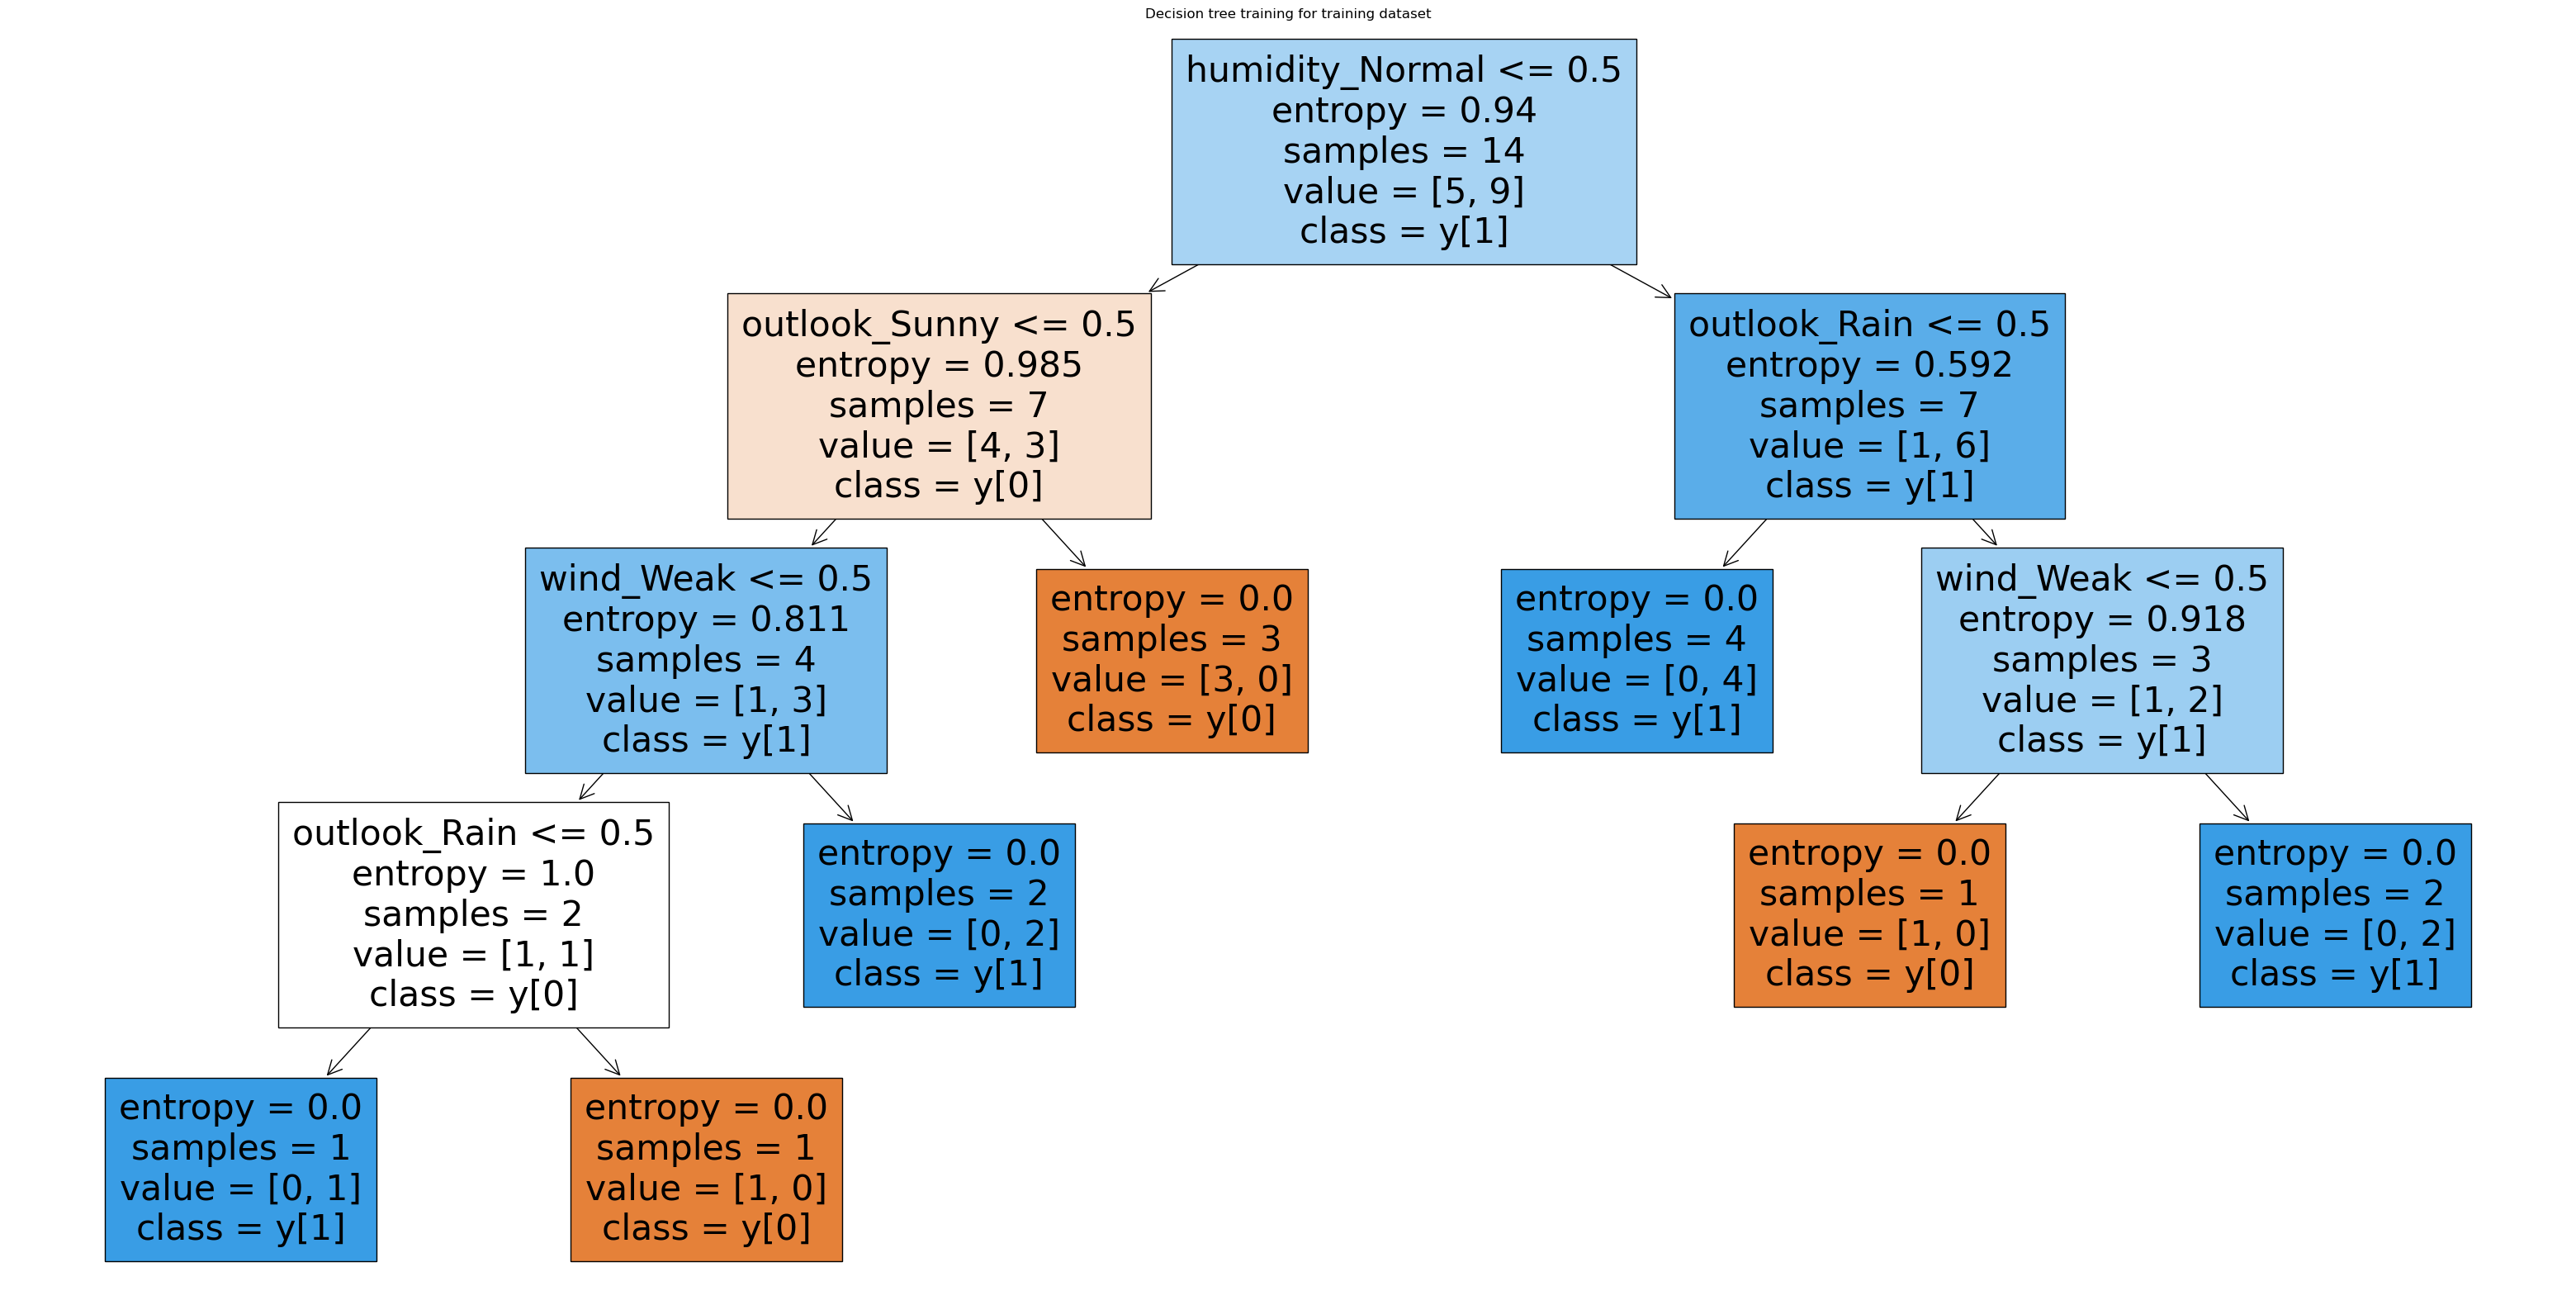

In [8]:
#Se establece el tamaño del diagrama
plt.figure(figsize=(40,20))
#Se grafica el árbol
#filled le da colores a los nodos
#feature_names recibe los nombres de los atributos para que se vean en el árbol
#class_names imprime la clase de cada hoja en el árbol
plot_tree(clf, filled=True, feature_names=list(X.columns),class_names=True)
#Título de la gráfica
plt.title("Decision tree training for training dataset")
#Imprimir la gráfica
plt.show()

3. Observe el árbol generado y extraiga la información que éste le brinda. Si hay algo que no comprende de la gráfica puede investigar o preguntar. Escriba la información que encuentre relevante sobre éste árbol. ¿El árbol arrancó por el atributo que usted obtuvo como aquel que aporta más información?

Si arrancó por ese atributo 'humity', puedo observar que humity junto con outlook_sunny y outlook_rain, son las clasificaciónes que más rápido llevan a una hoja, tambien que la máxima profundidad que tomó el arbol es de 4. Tambien que no volvió a utilizar el atributo humity por lo que podemos decir que usarlo como  clasificador fue muy buena elección . 

## Árbol de decisión para clasificación del Iris Dataset

En el taller anterior hemos cargado el dataset desde nuestros archivos locales. Sin embargo, SkLearn también nos provee de conjuntos de datos, los cuales podemos cargar directamente utilizando Python.

4. Investigue cómo cargar un dataset de SKLearn (se vale ChatGPT! ¿Por qué no?). Cargue el iris dataset. Guardar en X,y las variables de entrada y salida respectivamente, en tipo DataFrame. Separe en conjuntos de entrenamiento y testeo (*X_train, X_test, y_train, y_test*) en una proporción de 70% y 30%.

In [9]:
#Importar el Iris Dataset usando load_iris de sklearn (ya se importó load_iris). Darle el nombre 'iris'.
# Guardar en X,y las variables de entrada y salida respectivamente, en tipo DataFrame.
# Usar iris.data, iris.target.


In [10]:
#Separar en Train y Test set con una proporción de 70%-30%.

5. Definir un clasificador de árbol de decisión con DecisionTreeClassifier de SKlearn. Utilice el criterio 'entropy'. Fije una semilla aleatoria (random_state) para obtener los mismos resultados cada vez que corra el cuderno. Entrenar el Clasificador **con el conjunto de entrenamiento**.

In [11]:
#Definir un clasificador de árbol de decisión con DecisionTreeClassifier de SKLearn.
#Fije un random_state y utilice criterion='entropy'
#Entrenarlo


Es posible medir este modelo usando la métrica *accuracy*: la proporción entre predicciones correctas y el total de predicciones.

In [12]:
#Calcular predicciones para el conjunto de testeo.
y_pred = clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

NameError: name 'X_test' is not defined


Graficamos el árbol obtenido mediante el uso de plot_tree.

In [ ]:
plt.figure(figsize=(40,20))
plot_tree(clf, filled=True, class_names=True)
plt.title("Decision tree training for training dataset")
plt.show()

6. Explore algunos métodos del DecisionTreeClassifier como apply, get_depth, get_n_leaves, para el modelo obtenido. Imprímalos y corrobore su resultado usando el diagrama del árbol. Explique lo que hace cada uno de estos métodos.

In [ ]:
# Aplicar métodos apply, get_depth, get_n_leaves y entender lo que dicen del árbol.

## Diabetes dataset


A continuación, enntrene un árbol de decisión para el conjunto de datos sobre diabetes.

7. Entrene un árbol de decisión utilizando el clasificador de SKLearn con un conjunto de entrenamiento del 80% del dataset. Utilice random_state=0 y el criterio de entropía. Grafique el árbol. ¿Cuál es la precisión de este modelo?




In [ ]:
## Su código aquí

###  Poda del árbol
Uno de los parámetros del DecisionTreeClassifier es *ccp_alpha*, el cual es un parámetro para la poda del árbol mediante el método *Mínimal cost complexity*. El código siguiente arroja una lista de valores de alpha que resultan efectivos en la poda del árbol.

Entre mayor es el valor de $\alpha$, más se poda el árbol.

In [ ]:
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
ccp_alphas

9. Usando el arreglo de valores de *ccp_alpha* arrojados en la celda anterior, crear un loop que entrene un árbol para cada parámetro de ccp_alpha e imprima su precisión. De esta lista, extraer el valor de ccp_alpha optimo.

In [ ]:
## código aquí

10. Entrenar un clasificador con el ccp_alpha óptimo. Graficarlo y compararlo con el árbol inicial.

## Árbol de regresión
Para éste ejercicio usamos el dataset de Hitters, cuya variable objetivo es el salario, el cual no es una variable categórica. Para esto necesitamos un árbol de regresión, a saber, el algoritmo *DecisionTreeRegressor* de SKLearn.

Primero leemos el dataset, y eliminamos los valores faltantes, pues este algoritmo no los maneja. Consideraremosmos como entrada  X únicamente dos de sus variables: Years, Hits. Tomamos como variable objetivo el salario.

In [ ]:
# Se lee el dataset y se omiten los registros con valores faltantes.
df = pd.read_csv('Hitters.csv').dropna()

#Se imprime información sobre dicho dataset.
df.info()

In [ ]:
#Se toman sólo dos de las columnas
X = df[['Years', 'Hits']]
y = df.Salary

11. Entrenar un árbol de regresión en X,y con el parámetro max_leaf_nodes=3; usar el método score (coeficiente de determinación) para medir su desempeño, y graficar el árbol.


In [ ]:
## código aquí

In [ ]:
## Graficar el árbol

12. ¿En cuántas regiones $R_i$ separó el espacio de las dos variables de entrada el árbol anterior? Descríbalas.

13. Escriba sus conclusiones o preguntas sobre el ejercicio.